In [ ]:

from pathlib import Path
import os
import numpy as np
from dataclasses import asdict
import matplotlib.pyplot as plt
from echospec.utils.units import Units as u
from echospec.utils.parameters import Parameters


In [43]:

data_dir = Path(os.getcwd())/'data'/'2d_sweep'
no_echo_file = data_dir/'spectroscopy_data_no_echo.npz'
echo_file = data_dir/'echo.npy'

# data = np.load('filename.npy')

In [ ]:

data = np.load(no_echo_file, allow_pickle=True)
print(data.files)


params = data['params'].item()

params = Parameters(params)

['detunings', 'amplitudes', 'cutoff_vector', 'fwhm_matrix', 'snr_matrix', 'options', 'params']


In [46]:
cutoff_vector = data['cutoff_vector']
amplitudes = data['amplitudes']
fwhm_matrix = data['fwhm_matrix']
snr_matrix = data['snr_matrix']



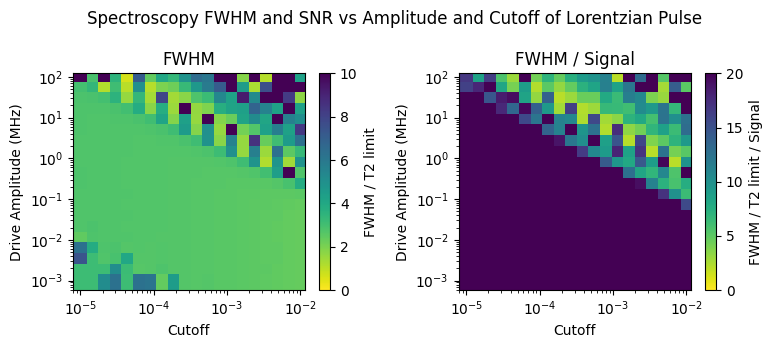

In [47]:

fig, axs=plt.subplots(1, 2, figsize=(8, 3.5))
mat1=np.array(fwhm_matrix).T / params.T2_limit/2/np.pi

mat2=mat1/snr_matrix.T
c1=axs[0].pcolormesh(
    cutoff_vector,
    amplitudes / u.pi2 / u.MHz,
    np.array(fwhm_matrix).T / params.T2_limit/2/np.pi,
    shading="auto",
    vmin=0,
    vmax=10,
    cmap="viridis_r",
)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel("Cutoff")
axs[0].set_ylabel("Drive Amplitude (MHz)")
axs[0].set_title("FWHM")
fig.colorbar(c1, ax=axs[0], label="FWHM / T2 limit")

c2=axs[1].pcolormesh(
    cutoff_vector,
    amplitudes / u.pi2 / u.MHz,
    mat2,
    shading="auto",
    vmin=0,
    vmax=20,
    cmap="viridis_r",
)
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel("Cutoff")
axs[1].set_ylabel("Drive Amplitude (MHz)")
axs[1].set_title("FWHM / Signal")
fig.colorbar(c2, ax=axs[1], label="FWHM / T2 limit / Signal")

fig.suptitle(
    "Spectroscopy FWHM and SNR vs Amplitude and Cutoff of Lorentzian Pulse")
plt.tight_layout()
plt.savefig("spectroscopy_fwhm_snr_vs_amplitude_vs_cutoff.png", dpi=300)
plt.show()